<a href="https://www.kaggle.com/code/kathmer/video-games-sales-statistical-analysis?scriptVersionId=297736870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/kaggle/input/datasets/rush4ratio/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


TASK 1: Statistical Foundations

Business framing: Are video game sales normally distributed, or driven by a few blockbuster hits?

In [3]:
df.shape

(16719, 16)

In [4]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

TASK 1A — Identify Numeric Structure


List all numeric columns

Separate:
numeric columns
categorical columns

In [5]:
numeric_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(exclude='number')

In [6]:
numeric_cols

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16715,2006.0,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16716,2016.0,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16717,2003.0,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [7]:
cat_cols

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Sports,Codemasters,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Platform,Wanadoo,NaN,NaN,NaN


In [8]:
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

🟢 TASK 1B — Distribution Exploration

For these columns:

Global_Sales
NA_Sales
EU_Sales
JP_Sales

compute:

.describe()
.skew()
.median()
.mean()

Global Sales

In [9]:
df['Global_Sales'].describe().round(2)

count    16719.00
mean         0.53
std          1.55
min          0.01
25%          0.06
50%          0.17
75%          0.47
max         82.53
Name: Global_Sales, dtype: float64

In [10]:
df['Global_Sales'].skew().round(2)

np.float64(17.38)

In [11]:
global_sales_median = df['Global_Sales'].median()
global_sales_mean = df['Global_Sales'].mean()

print(f'The mean is {global_sales_mean} and the median is {global_sales_median}')

The mean is 0.5335426759973684 and the median is 0.17


<Axes: >

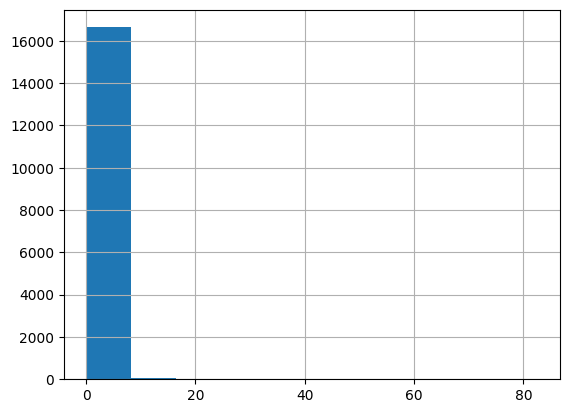

In [12]:
df['Global_Sales'].hist()

Skew value interpretation
0	symmetric
0–1	mild skew
1–2	strong skew
>5	extremely skewed
17+	blockbuster-driven distribution

My value ≈ 17.38 → so my score distribution is right-skewed. Mean > median means the presence of extreme values that inflate the mean. 

Conclusion : The video game market is dominated by a few blockbuster titles, while the majority of games achieve relatively modest sales.

EU Sales

In [13]:
df['EU_Sales'].describe().round(2)

count    16719.00
mean         0.15
std          0.50
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: EU_Sales, dtype: float64

In [14]:
df['EU_Sales'].skew().round(2)

np.float64(18.85)

In [15]:
eu_sales_median = df['EU_Sales'].median()
eu_sales_mean = df['EU_Sales'].mean()

eu_sales_mean, eu_sales_median

(np.float64(0.14502482205873557), 0.02)

<Axes: >

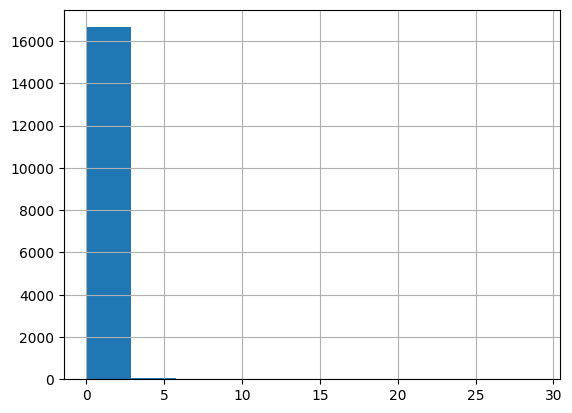

In [16]:
df['EU_Sales'].hist()

A skew of 18.85 is extremely high.

That means: most games sell almost nothing in Europe and a tiny number sell massively. The EU market data is heavily dominated by outliers, confirming Global Sales behaviour

North America Sales

In [17]:
df['NA_Sales'].describe().round(2)

count    16719.00
mean         0.26
std          0.81
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: NA_Sales, dtype: float64

In [18]:
df['NA_Sales'].skew().round(2)

np.float64(18.77)

In [19]:
na_mean = df['NA_Sales'].mean()
na_median = df['NA_Sales'].median()

na_mean, na_median

(np.float64(0.26333034272384714), 0.08)

<Axes: >

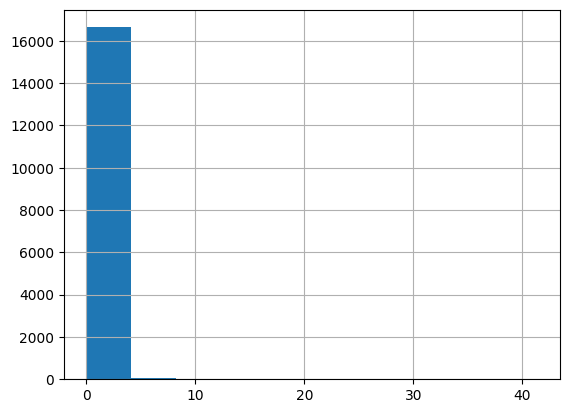

In [20]:
df['NA_Sales'].hist()

Same behaviour, extreme skew, mean dominated by outliers, median sales very small

Japan Sales

In [21]:
df['JP_Sales'].describe().round(2)

count    16719.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: JP_Sales, dtype: float64

In [22]:
df['JP_Sales'].skew().round(2)

np.float64(11.21)

In [23]:
jp_median = df['JP_Sales'].median()
jp_mean = df['JP_Sales'].mean()

jp_mean, jp_median

(np.float64(0.07760212931395419), 0.0)

<Axes: >

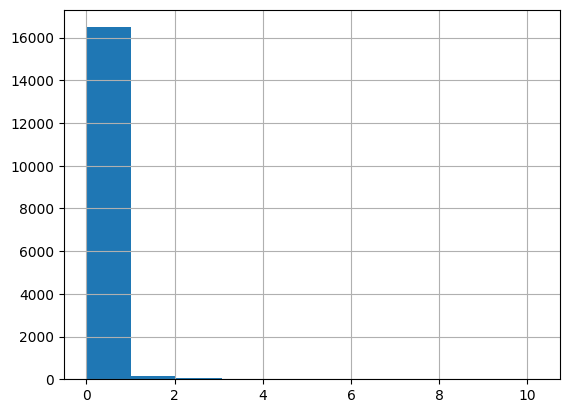

In [24]:
df['JP_Sales'].hist()

More than half of games sell virtually nothing in Japan.
A few games sell extremely well and pull the average up.

So Japan has :

Very selective market
Few massive hits
Large number of niche titles with minimal sales

CONCLUSION : Video game sales are not normally distributed anywhere — success is concentrated in a small number of titles globally.
The blockbuster dynamic exists across all regions.

TASK 2 : Correlation

In [25]:
corr = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr().round(2)
corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.00,0.77,0.45,0.64,0.94
EU_Sales,0.77,1.00,0.44,0.72,0.90
JP_Sales,0.45,0.44,1.00,0.29,0.61
Other_Sales,0.64,0.72,0.29,1.00,0.75
Global_Sales,0.94,0.90,0.61,0.75,1.00


Correlation measures:

Do two variables move together?

1.0 → move together perfectly

0.7+ → strong relationship

0.4–0.6 → moderate

<0.3 → weak

CONCLUSIONS:

- Games that sell well in North America usually sell well in Europe
- Japan follows a different sales pattern - some games huge in Japan are not huge in NA/EU
- Global Sales correlates extremely strongly with NA and EU, regions with larger contribution to global totals will correlate more strongly


TASK 3 — Compare Market Behaviour Visually

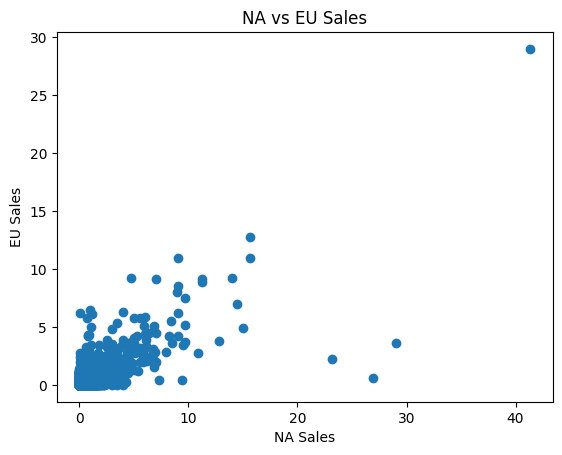

In [26]:
plt.scatter(df['NA_Sales'], df['EU_Sales'])

plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('NA vs EU Sales')

plt.show()

Confirms my conclusion : most games have very low sales in both regions, the outliers are the gaming blockbusters

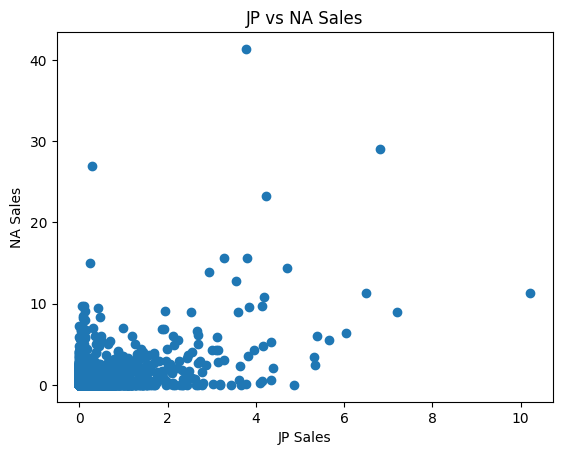

In [27]:
plt.scatter(df['JP_Sales'], df['NA_Sales'])

plt.xlabel('JP Sales')
plt.ylabel('NA Sales')
plt.title('JP vs NA Sales')

plt.show()

The global video game market is dominated by low-selling titles clustered near zero, while regional blockbuster performance varies significantly, with Japan exhibiting more independent success patterns compared to Western markets

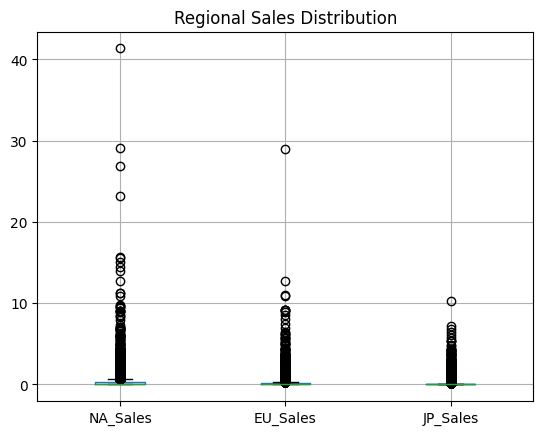

In [28]:
df[['NA_Sales','EU_Sales','JP_Sales']].boxplot()
plt.title('Regional Sales Distribution')
plt.show()

Boxplot analysis shows that North America not only generates the largest blockbuster titles but also exhibits the highest median sales, indicating stronger baseline performance across titles compared to Europe and Japan.

TASK 5 - Histograms comparison

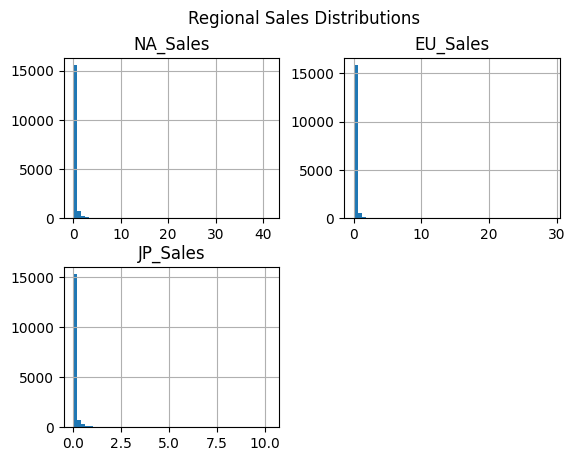

In [29]:
df[['NA_Sales','EU_Sales','JP_Sales']].hist(bins=50)
plt.suptitle('Regional Sales Distributions')
plt.show()

TASK 6 — Understanding Spread (Variance & Standard Deviation)

Are NA sales more consistent or more volatile than EU and JP?

In [30]:
df[['NA_Sales','EU_Sales','JP_Sales']].std()

NA_Sales    0.813514
EU_Sales    0.503283
JP_Sales    0.308818
dtype: float64

The North American market has the widest performance gap between small games and blockbusters, while Japan displays a more concentrated distribution with lower variability

In [31]:
df['Global_Sales'].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

0.25    0.0600
0.50    0.1700
0.75    0.4700
0.90    1.2000
0.95    2.0400
0.99    5.4582
Name: Global_Sales, dtype: float64

Only the top 1% of games exceed 5.4 million global sales, highlighting how rare blockbuster success truly is

In [32]:
q1 = df['Global_Sales'].quantile(0.25)
q3 = df['Global_Sales'].quantile(0.75)

iqr = q3 - q1

upper_outlier_threshold = q3 + 1.5 * iqr
upper_outlier_threshold

np.float64(1.085)

Games selling more than about 1.08 million units globally are statistically unusual compared to the majority of titles.

Only a small fraction of games exceed roughly 1 million global sales, meaning blockbuster-level performance lies well outside the typical range of the market.